In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from scipy.stats import randint

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ConceptofAIandTechnology/Assignment2/heart_attack_risk_dataset.csv')
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
df.shape

(50000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [ ]:
df.describe()


,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
df['Heart_Attack_Risk'].value_counts()

,count
Heart_Attack_Risk,
Low,25024
Moderate,14904
High,10072


In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [ ]:
df=df[df['Heart_Attack_Risk']!='Moderate']

In [ ]:
df.shape

(35096, 20)

In [ ]:
heart_attack=df['Heart_Attack_Risk'].value_counts().reset_index()
heart_attack

,Heart_Attack_Risk,count
0,Low,25024
1,High,10072


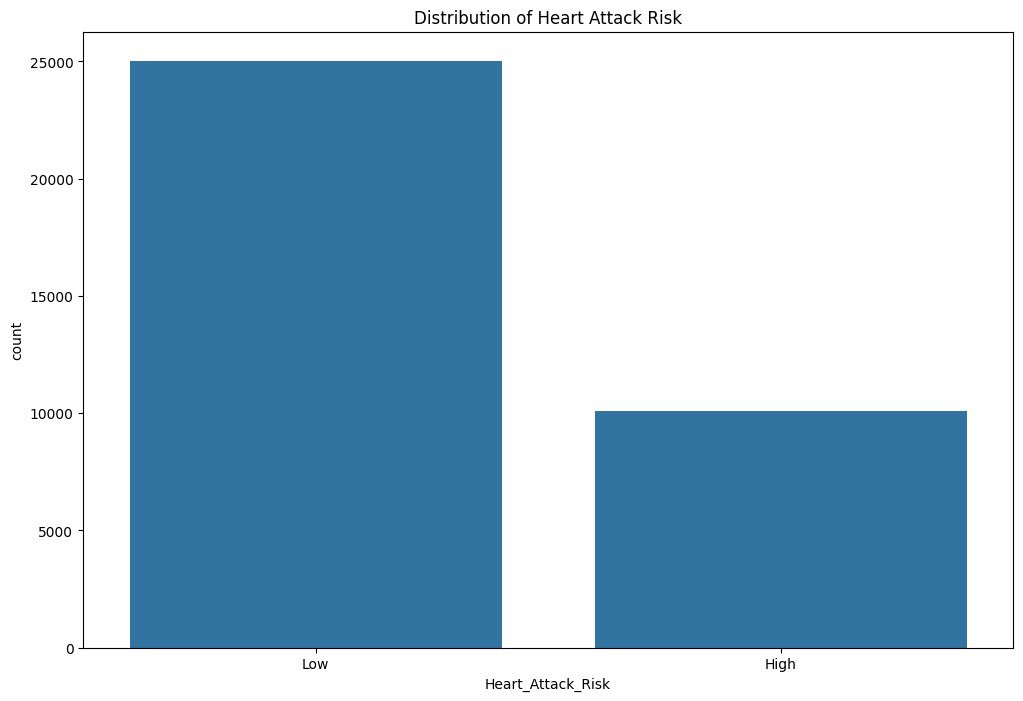

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=heart_attack,x='Heart_Attack_Risk',y='count')
plt.title('Distribution of Heart Attack Risk')
plt.show()

## The data is highly unbalanced

In [ ]:
cat_columns=df.select_dtypes(include=['object'])
num_columns=df.select_dtypes(include=['number'])
cat_columns

,Gender,Physical_Activity_Level,Stress_Level,Chest_Pain_Type,Thalassemia,ECG_Results,Heart_Attack_Risk
0,Female,Moderate,Moderate,Non-anginal,Reversible defect,Normal,Low
2,Male,Moderate,Low,Typical,Reversible defect,ST-T abnormality,Low
3,Male,Moderate,Low,Typical,Fixed defect,Left Ventricular Hypertrophy,Low
5,Male,Moderate,Low,Atypical,Fixed defect,Normal,High
6,Male,Low,Low,Non-anginal,Normal,Normal,Low
...,...,...,...,...,...,...,...
49992,Female,Moderate,Moderate,Non-anginal,Fixed defect,ST-T abnormality,Low
49993,Female,Moderate,Moderate,Typical,Reversible defect,Normal,Low
49994,Male,Moderate,Moderate,Non-anginal,Reversible defect,Left Ventricular Hypertrophy,Low
49995,Male,Low,High,Typical,Reversible defect,ST-T abnormality,High


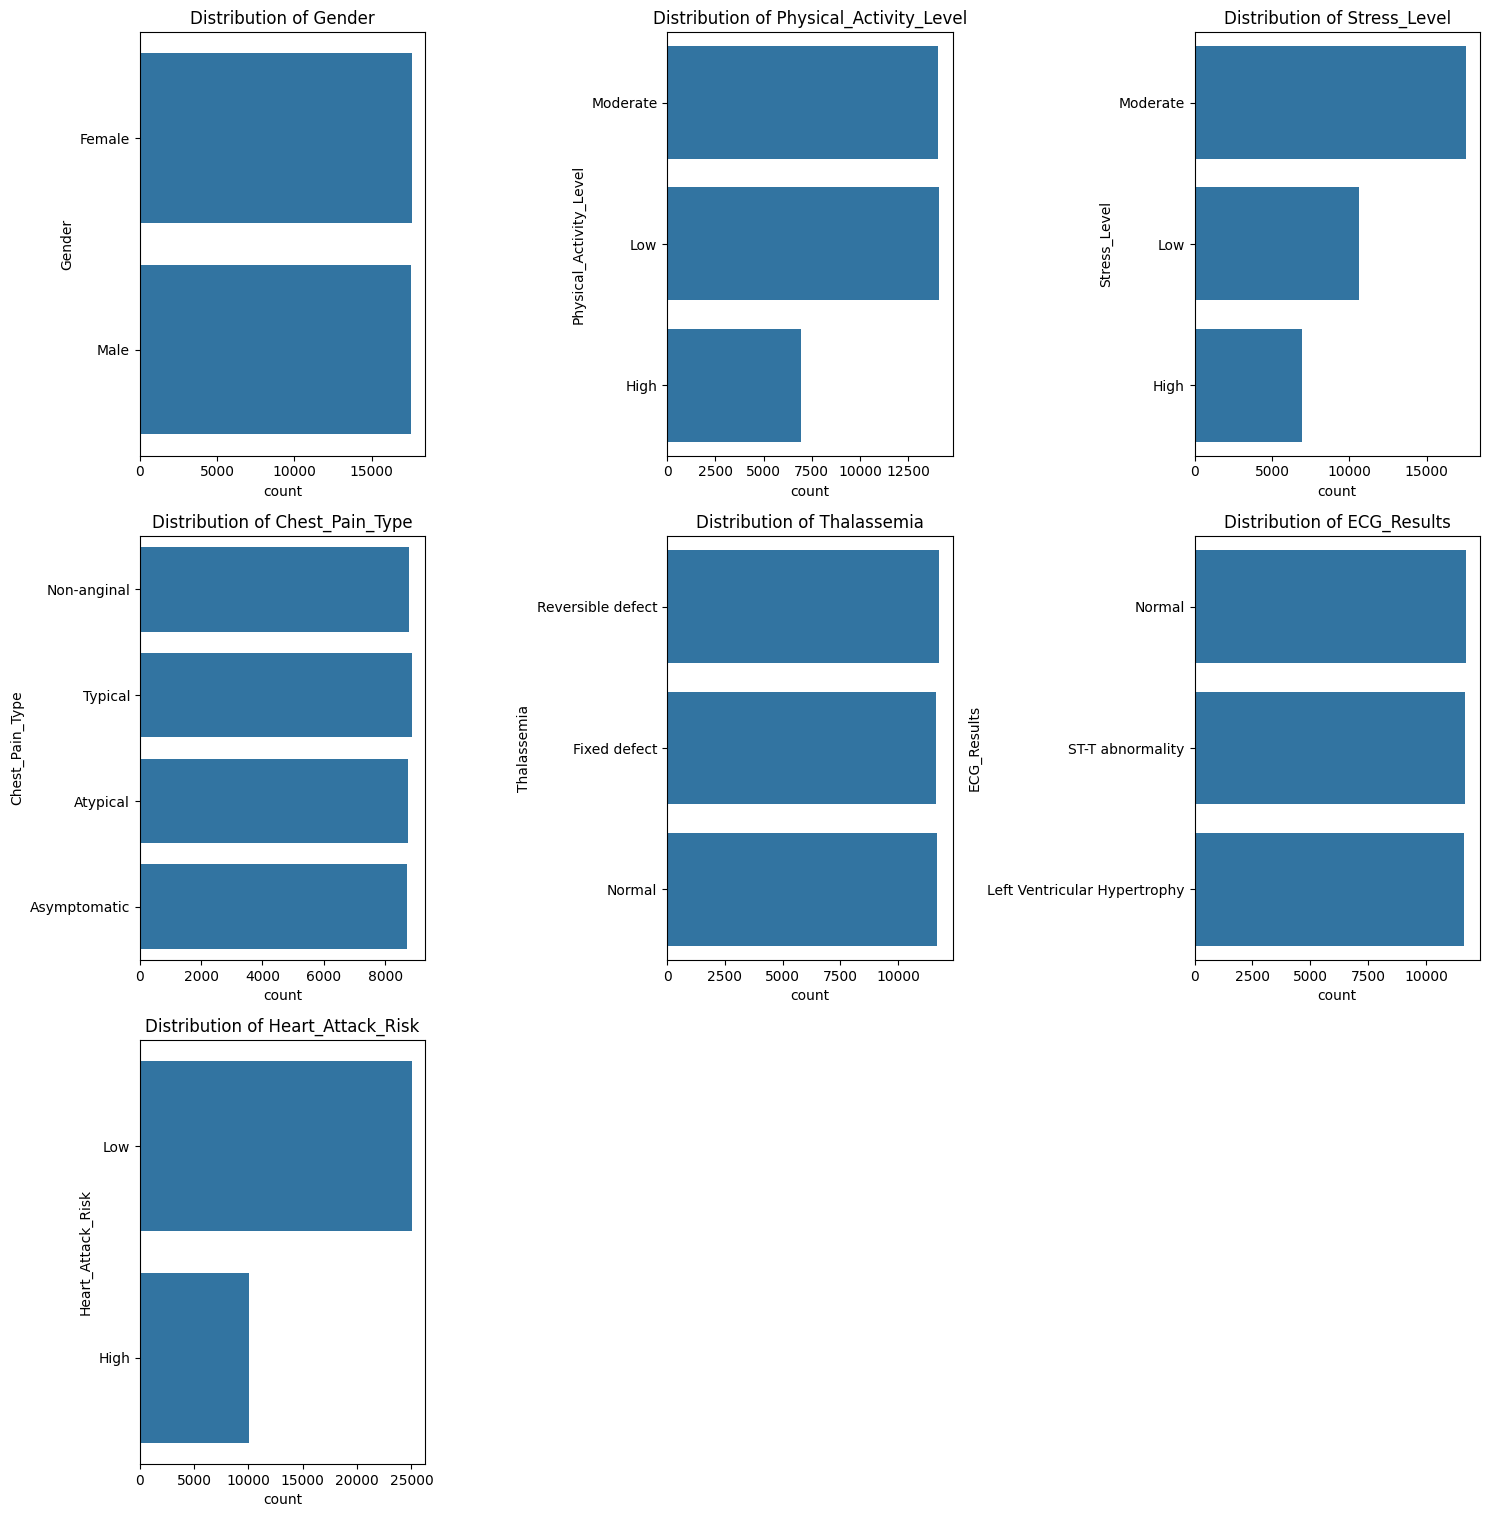

In [ ]:
# For distributiopn of categorical columns
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3
plt.figure(figsize=(15, n_rows * 5))
for i,col in enumerate(cat_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

### The above plot shows the distribution of each categorical columns

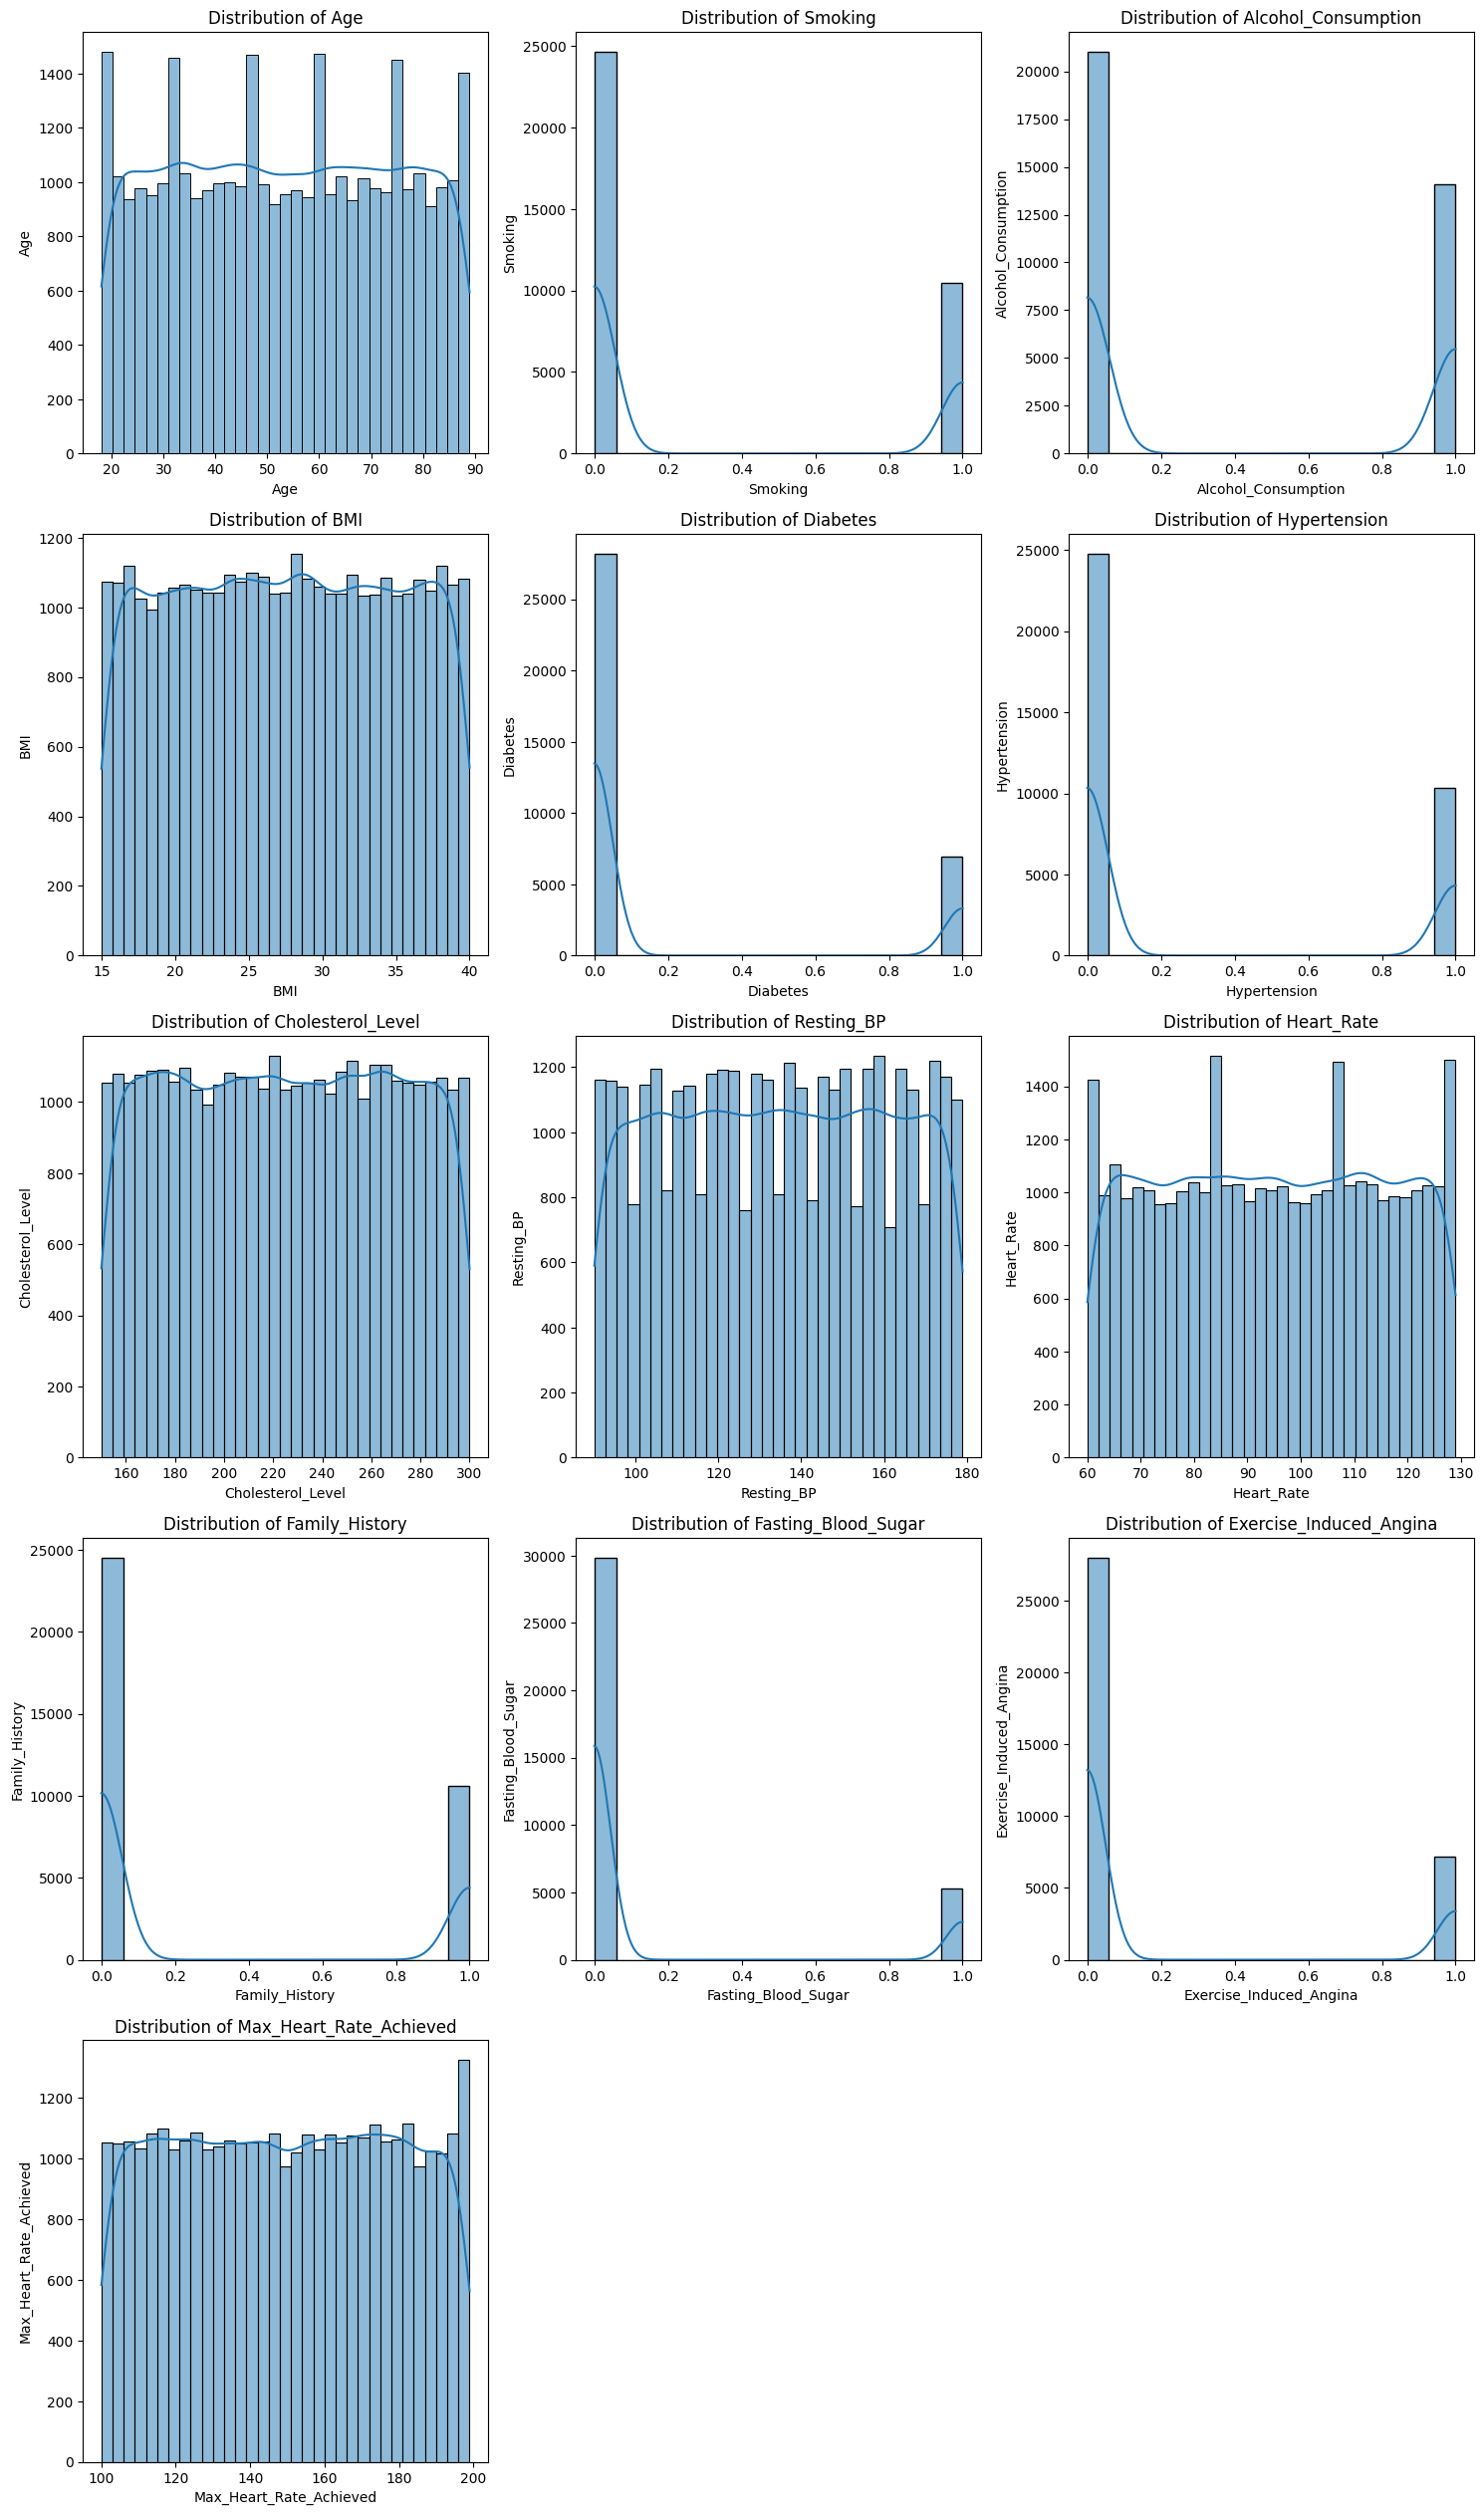

In [ ]:
# For distributiopn of numerical columns
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3
plt.figure(figsize=(15, n_rows * 5))
for i,col in enumerate(num_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

### The above plot shows the distribution of each numerical columns which shows almost all the columns are roughly uniform

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

<ipython-input-138-861807ac5031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
<ipython-input-138-861807ac5031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
<ipython-input-138-861807ac5031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
<ipython-input-138-861807ac5031>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

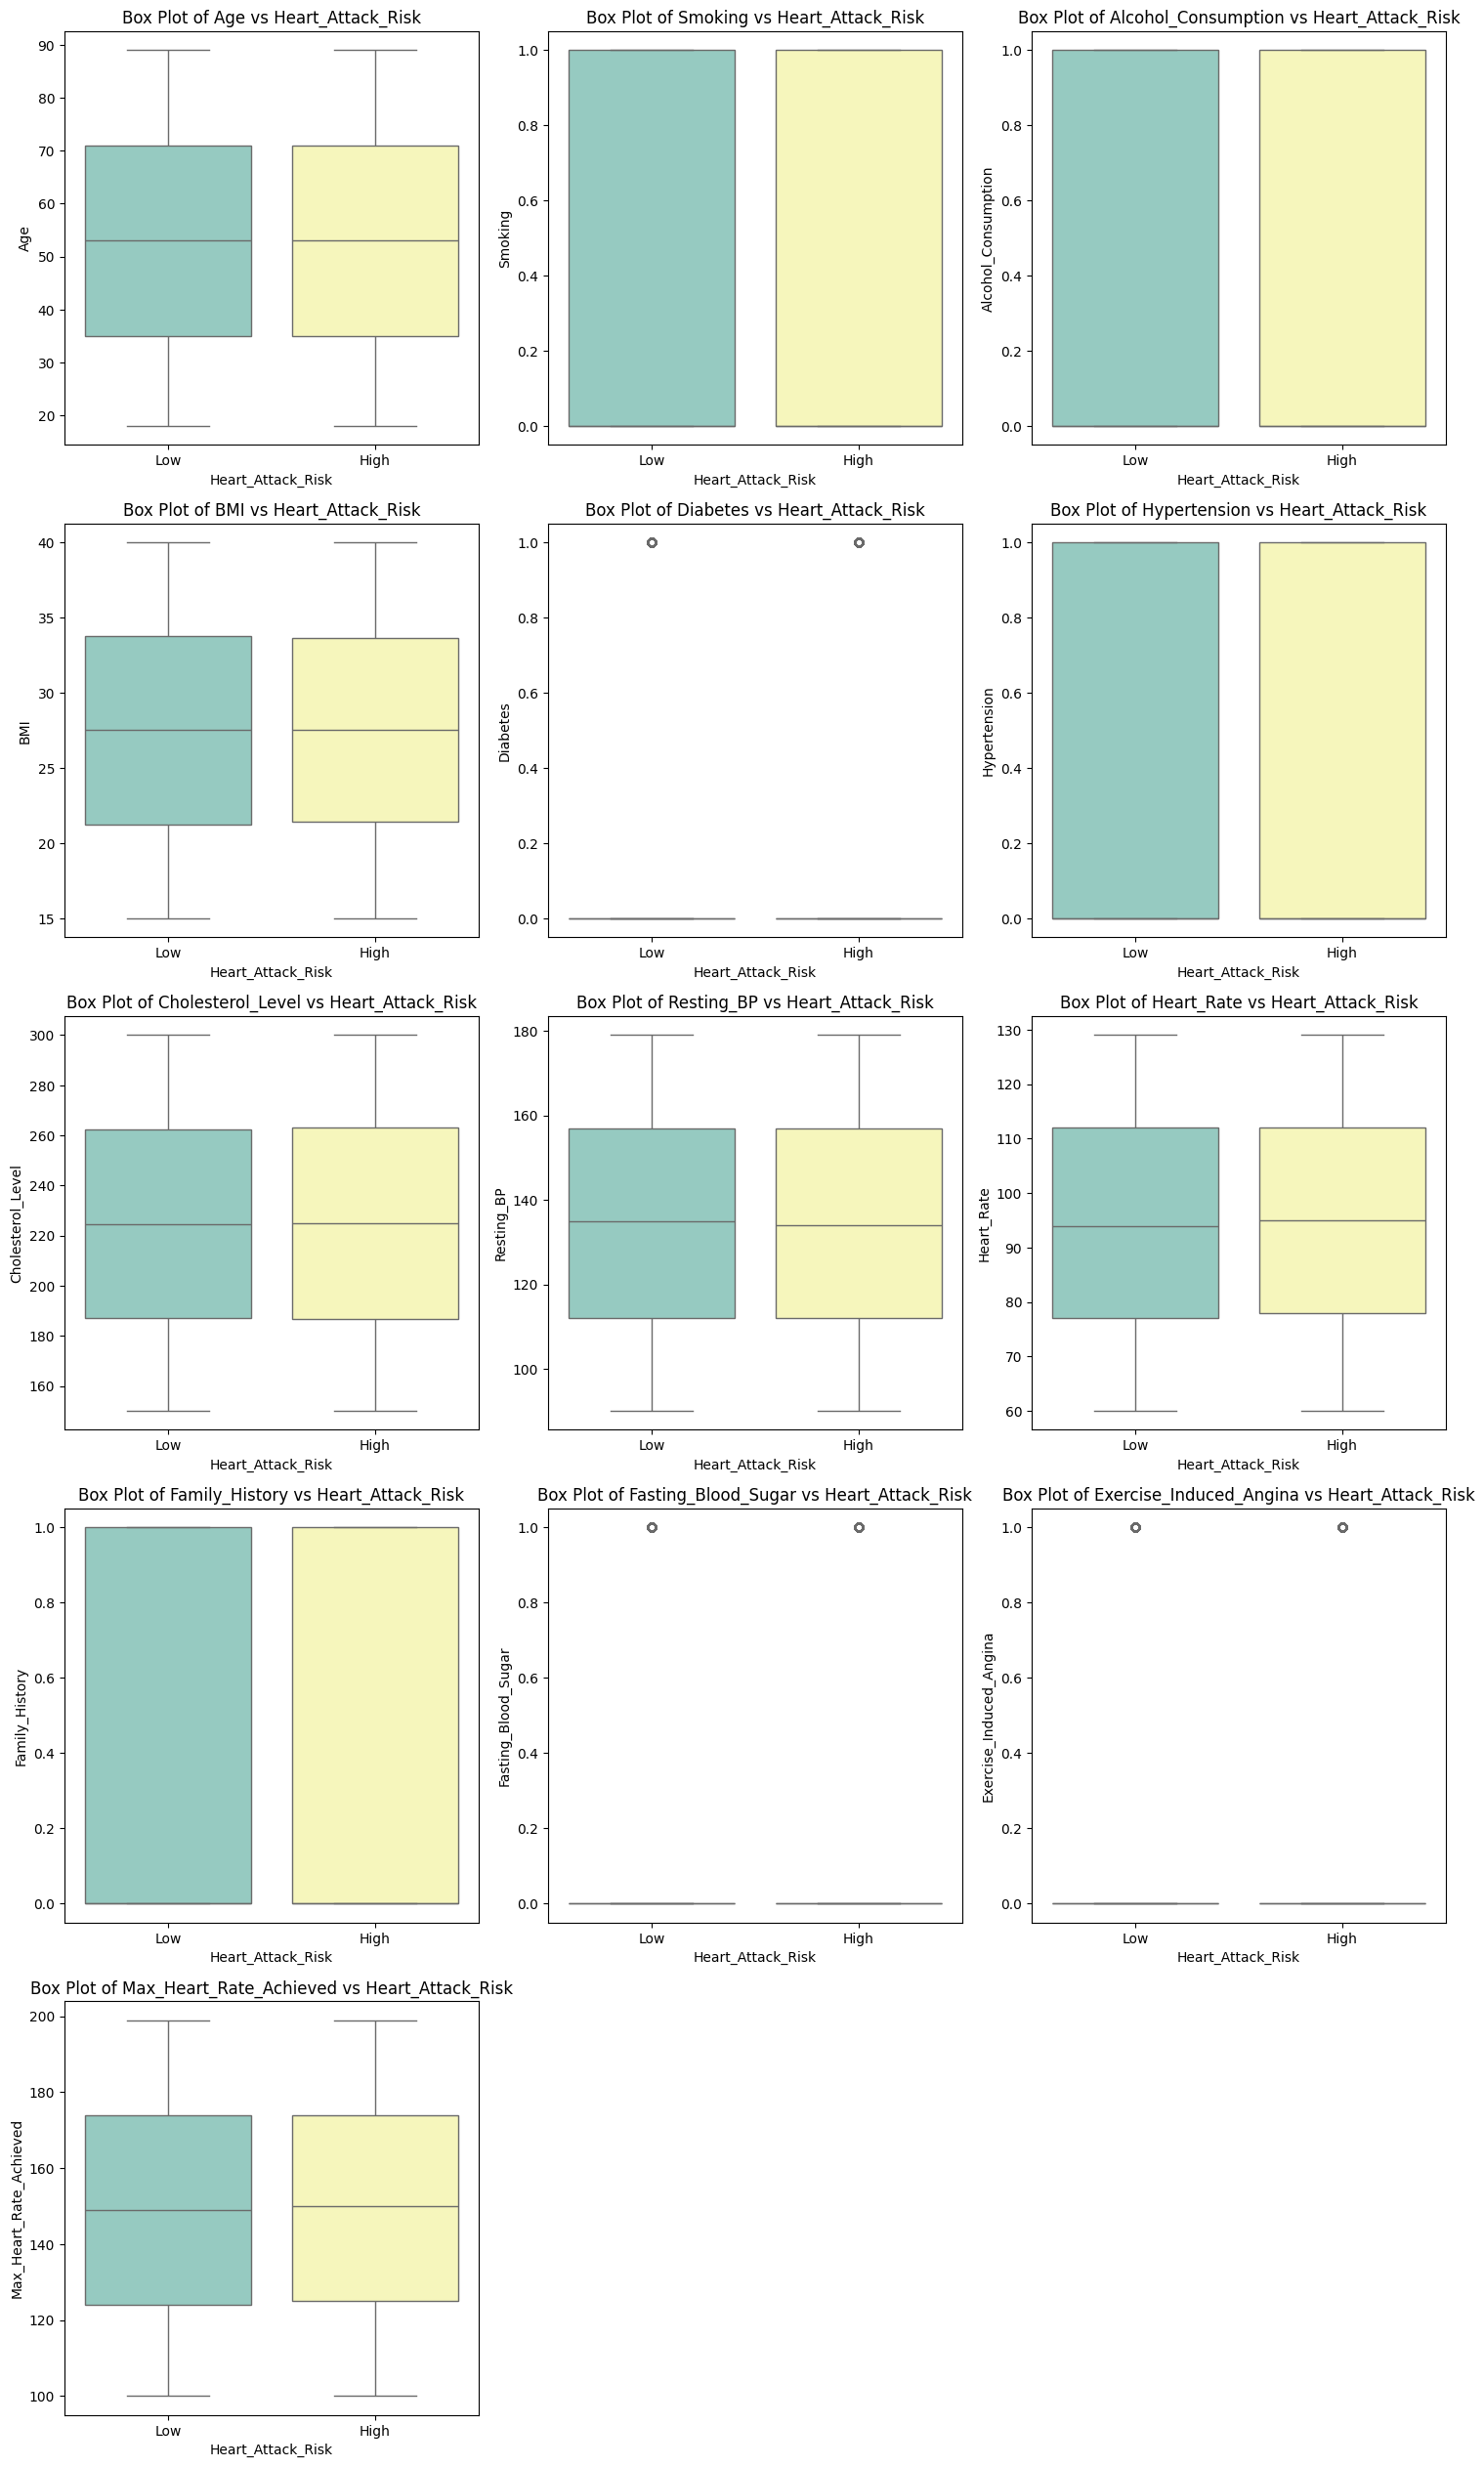

In [ ]:
# Box plot with respect with heart attack risk
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3
plt.figure(figsize=(15, n_rows * 5))
for i, feature in enumerate(num_columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(data=df, x='Heart_Attack_Risk', y=feature, palette='Set3')
    plt.title(f'Box Plot of {feature} vs Heart_Attack_Risk')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [ ]:
# Heart_attack_risk over age
heart_attack_over_age=df[['Age','Heart_Attack_Risk']].value_counts().reset_index()
heart_attack_over_age.columns = ['Age','Heart_Attack_Risk', 'Count']
heart_attack_over_age

,Age,Heart_Attack_Risk,Count
0,34,Low,393
1,22,Low,384
2,68,Low,379
3,49,Low,379
4,80,Low,379
...,...,...,...
139,39,High,122
140,27,High,121
141,31,High,118
142,51,High,118


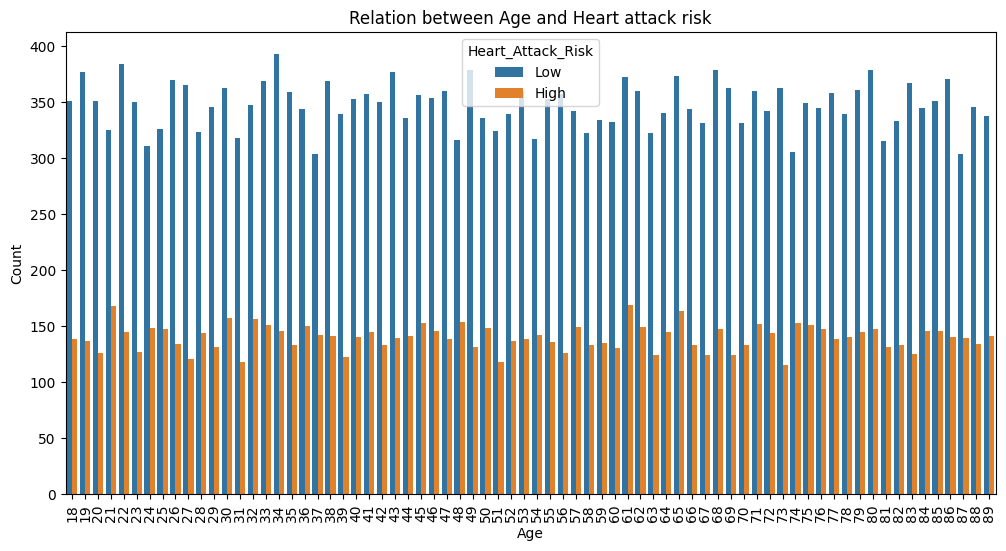

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_age,x='Age',y='Count',hue='Heart_Attack_Risk')
plt.title("Relation between Age and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

### Heart attack risk is generally lower across all ages, but there is a slight increase in high-risk cases as age progresses.

In [ ]:
# Heart_attack_risk over gender
heart_attack_over_gender=df[['Gender','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_gender

,Gender,Heart_Attack_Risk,count
0,Female,Low,12515
1,Male,Low,12509
2,Female,High,5061
3,Male,High,5011


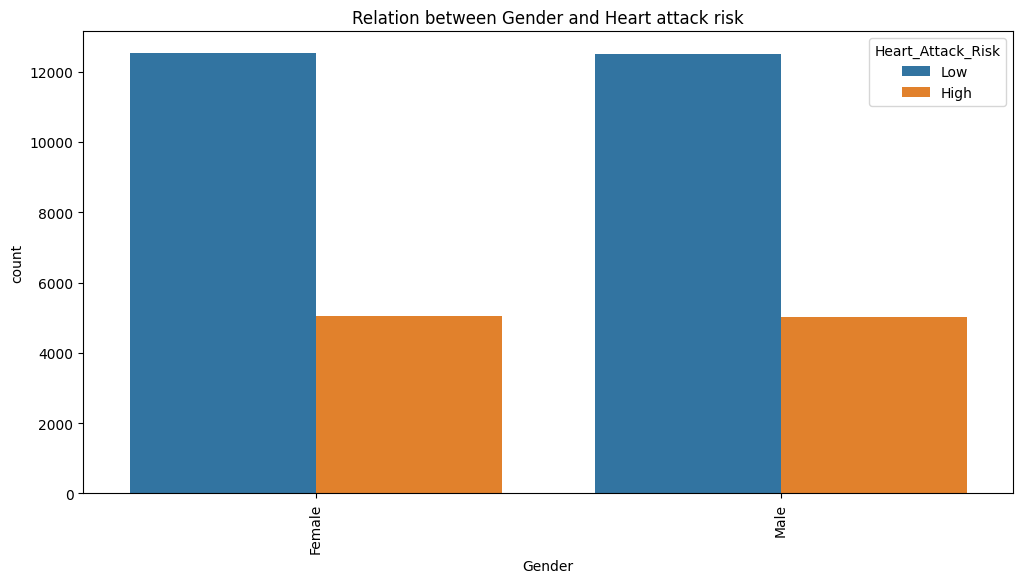

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_gender,x='Gender',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Gender and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

## From the above bar plt their is equal change of hear attack risk to both male and female

In [ ]:
# Heart_attack_risk over the alcohol consumption
heart_attack_over_alcohol=df[['Alcohol_Consumption','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_alcohol

,Alcohol_Consumption,Heart_Attack_Risk,count
0,0,Low,15024
1,1,Low,10000
2,0,High,5988
3,1,High,4084


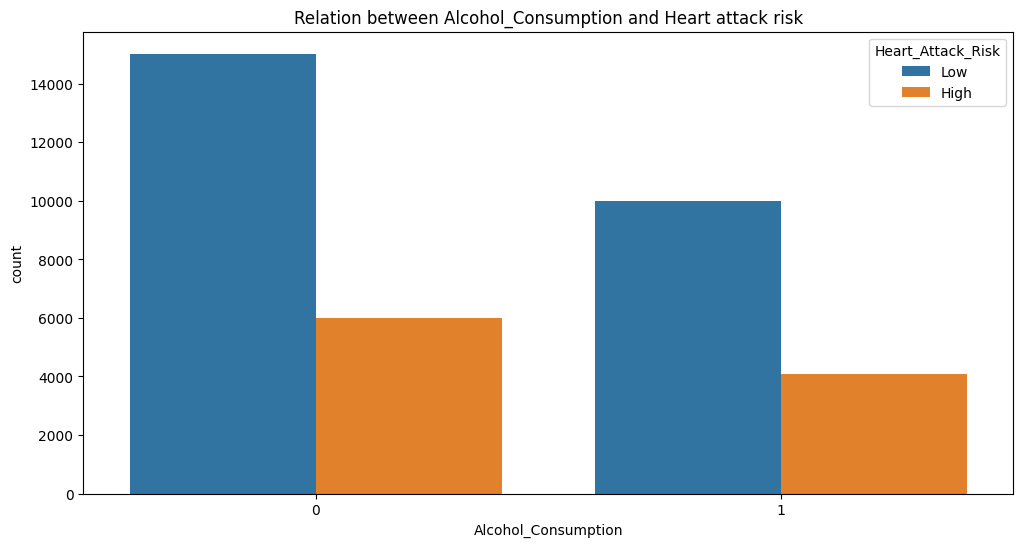

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_alcohol,x='Alcohol_Consumption',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Alcohol_Consumption and Heart attack risk")
#plt.xticks(rotation=90)
plt.show()

## People who do not consume alcohol (0) have a higher count overall, but a greater proportion of them have a low heart attack risk.
## People who consume alcohol (1) have a lower count overall, but they also tend to have a higher proportion of heart attack risk compared to non-drinkers.
## Alcohol consumers still have a significant number of people with low heart attack risk, suggesting that other factors might also contribute.

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [ ]:
heart_attack_over_phyact=df[['Physical_Activity_Level','Heart_Attack_Risk']].value_counts().reset_index(name='count')
heart_attack_over_phyact

,Physical_Activity_Level,Heart_Attack_Risk,count
0,Moderate,Low,10055
1,Low,Low,10025
2,High,Low,4944
3,Low,High,4069
4,Moderate,High,4003
5,High,High,2000


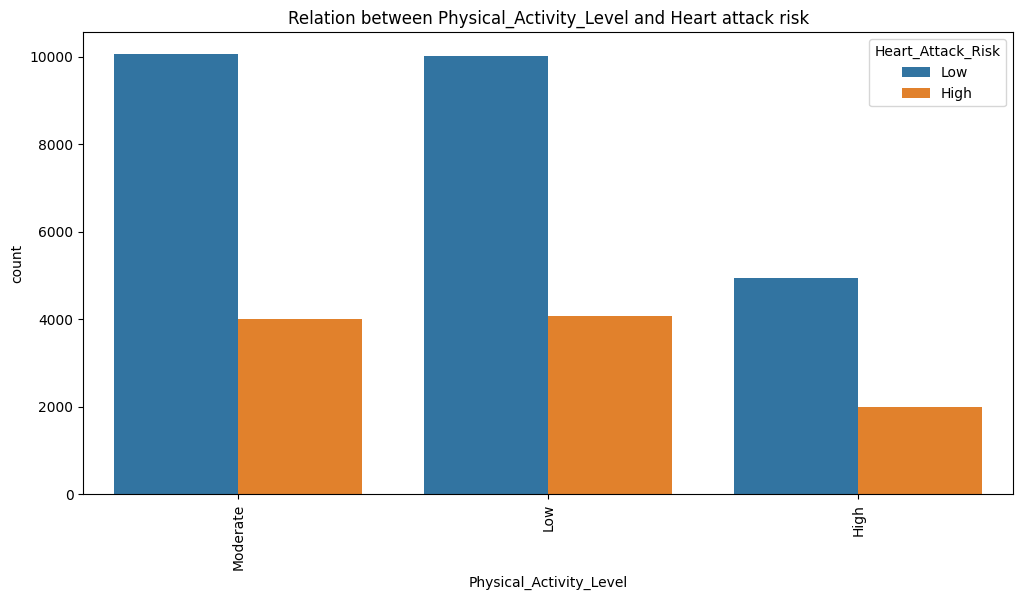

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=heart_attack_over_phyact,x='Physical_Activity_Level',y='count',hue='Heart_Attack_Risk')
plt.title("Relation between Physical_Activity_Level and Heart attack risk")
plt.xticks(rotation=90)
plt.show()

### The chart suggests an inverse relationship between physical activity and heart attack risk. Moderate activity levels correlate with the highest low-risk counts and the lowest high-risk counts, while low activity shows the opposite trend, indicating that increased physical activity may reduce heart attack risk

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low


In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

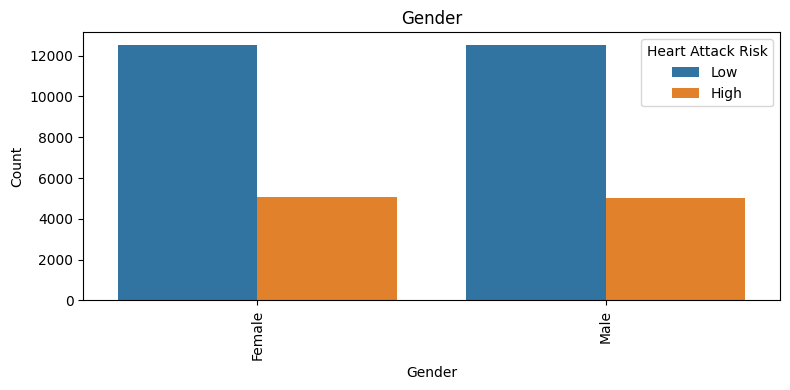

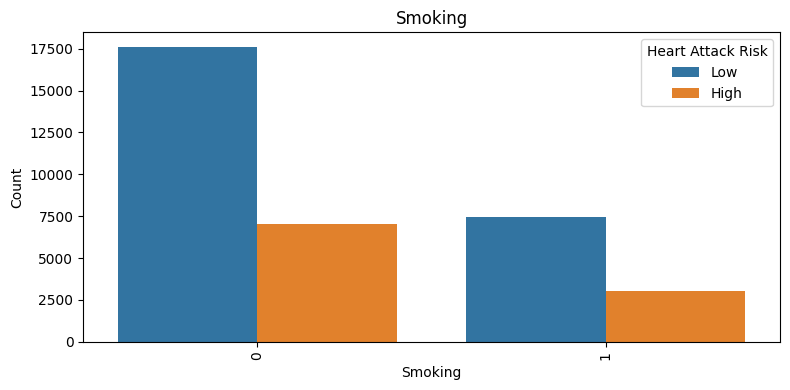

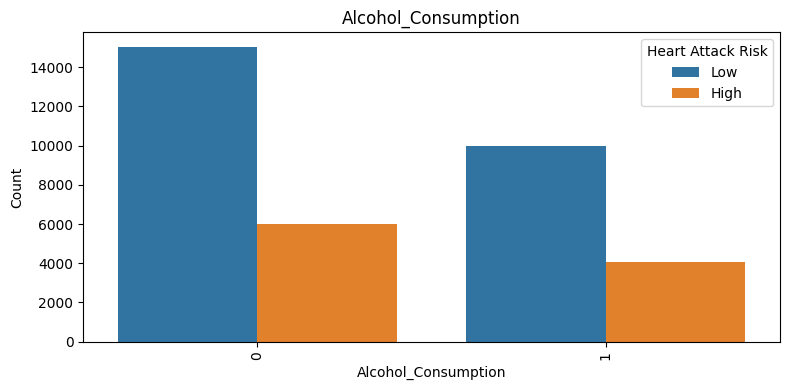

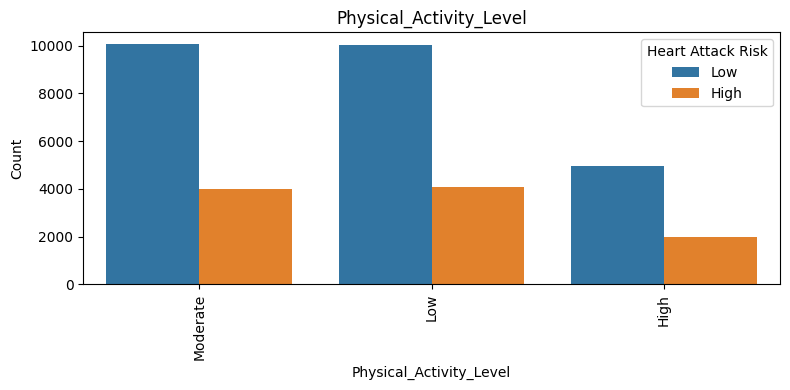

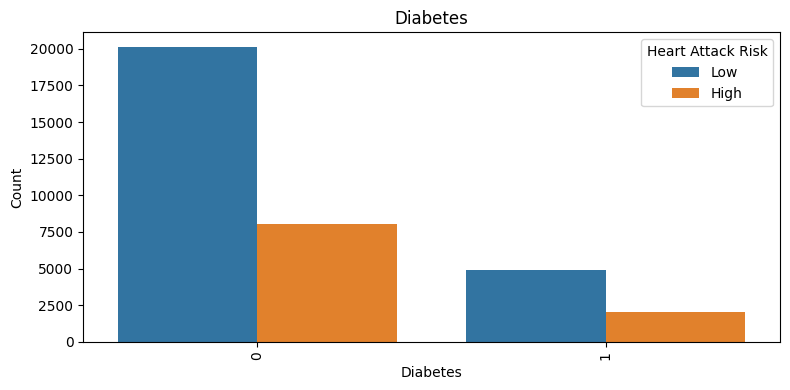

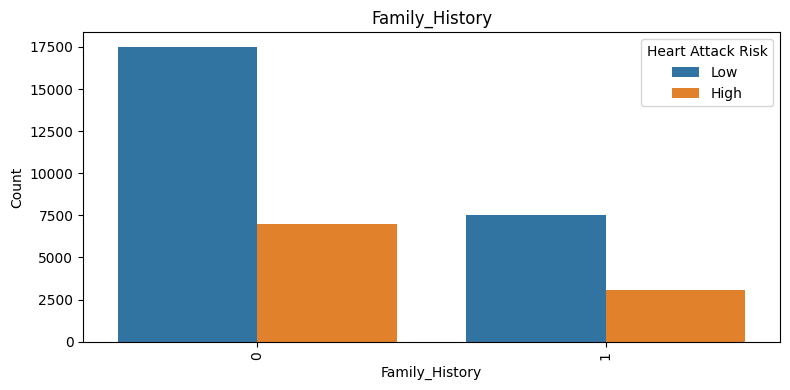

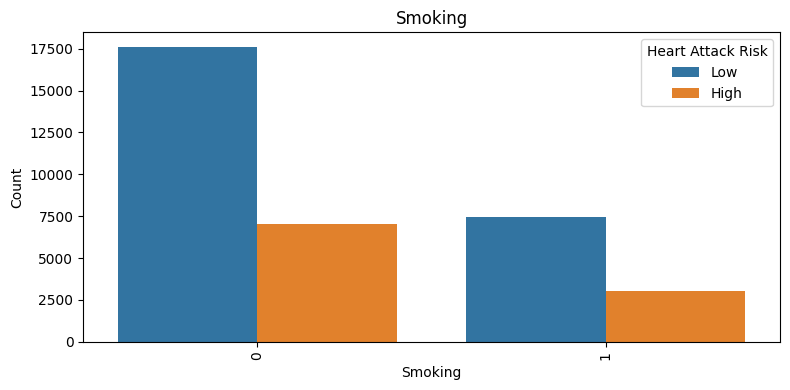

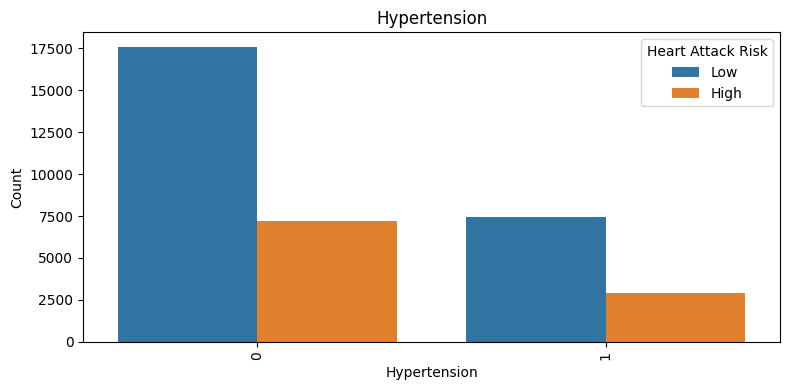

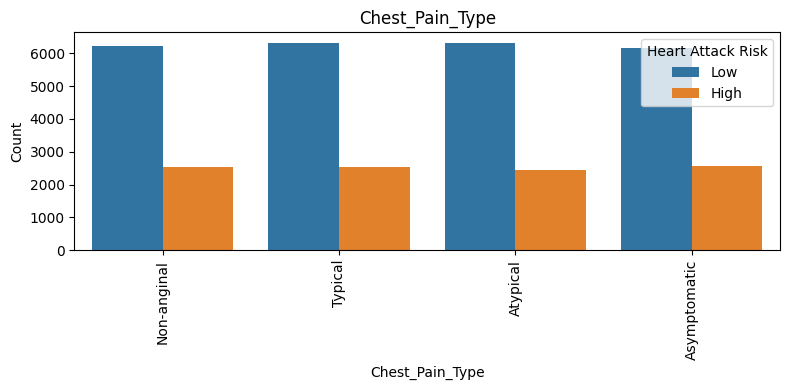

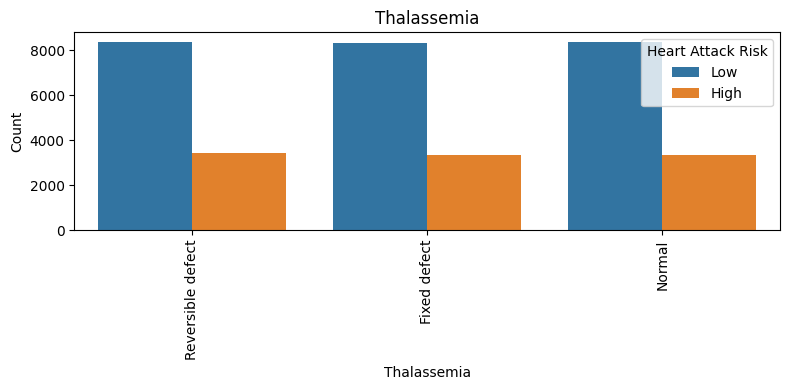

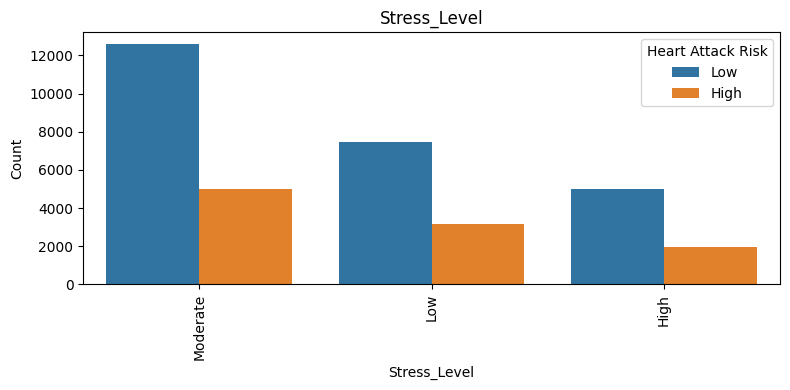

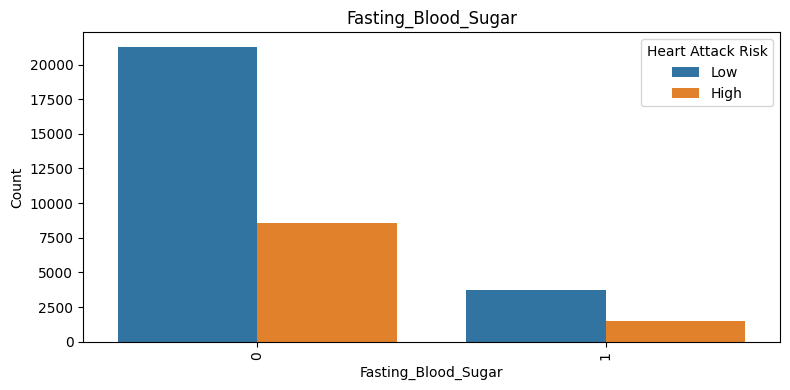

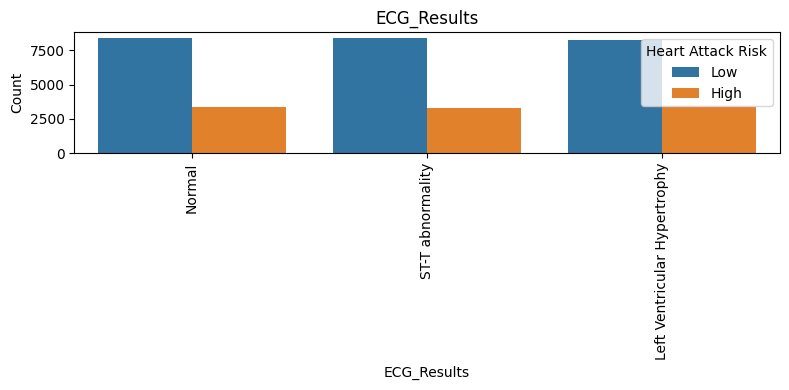

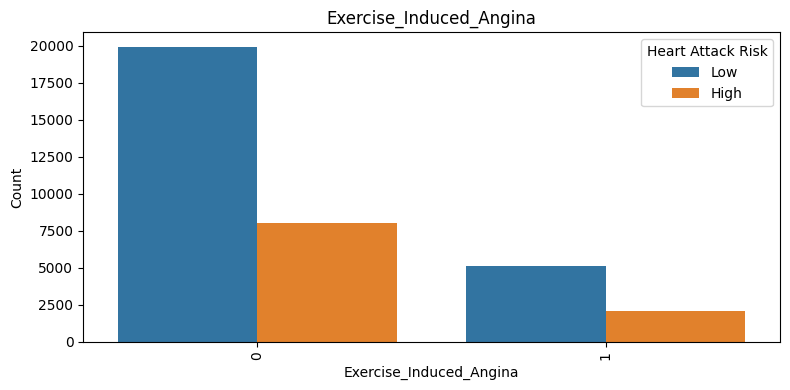

In [ ]:
# categorical columns with respect to heart attack risk
categorical_columns = [
    'Gender', 'Smoking','Alcohol_Consumption','Physical_Activity_Level','Diabetes', 'Family_History', 'Smoking','Hypertension',
    'Chest_Pain_Type', 'Thalassemia', 'Stress_Level', 'Fasting_Blood_Sugar', 'ECG_Results', 'Exercise_Induced_Angina'
]

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, hue='Heart_Attack_Risk')
    plt.title(f'{column}')
    plt.ylabel('Count')
    plt.legend(title='Heart Attack Risk')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low


In [ ]:
columns_to_encode = ['Gender', 'Physical_Activity_Level', 'Stress_Level',
                       'Chest_Pain_Type', 'Thalassemia', 'ECG_Results',
                       'Heart_Attack_Risk']


In [ ]:
# conveting cateorical columns to numerical using LabelEncoder
label_encoders = {}

# Apply Label Encoding
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Spliting into target and independenc variable
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']

In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
5,41,1,0,1,2,36.11,0,0,271.2,141,119,0,1,1,0,0,1,0,101,0
6,20,1,1,0,1,15.12,0,0,164.8,154,67,0,1,2,1,0,1,0,176,1


In [ ]:
# Scalng the data for making them in same range
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [ ]:
# Spliting into train and test
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y,random_state=42)

## Building Primary Model

In [ ]:
# Logistic Regression from scratch
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None # Weights for features
        self.bias = None # Bias term
        self.losses = [] # Stores loss values for each iteration

     # Sigmoid for binary classification
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
     # Initialize weights and bias with zeros
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

          # Gradient Descent optimization
        for _ in range(self.n_iters):
            # Compute linear predictions: X*w + b
            linear_pred = np.dot(X, self.weights) + self.bias

             # Apply sigmoid function to get probability estimates
            pred = self._sigmoid(linear_pred)

             # Compute binary cross-entropy loss
            cost = -(1 / n_samples) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

             # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (pred - y))
            db = (1 / n_samples) * np.sum(pred - y)

            # Update weights and bias using gradient descent
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Store loss for analysis
            self.losses.append(cost)

    def predict(self, X):
        threshold = 0.5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)


In [ ]:
X_train.shape

(24567, 19)

## Building Primary Model

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_lr)}")
print(f"precission Score = {precision_score(y_test,y_pred_lr)}")
print(f"Recall Score = {recall_score(y_test,y_pred_lr)}")
print(f"F1 Score = {f1_score(y_test,y_pred_lr)}")

Accuracy Score = 0.7129831892867319
precission Score = 0.7129831892867319
Recall Score = 1.0
F1 Score = 0.8324462186737636


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
print(cm)

[[   0 3022]
 [   0 7507]]


## Building Two Model RandomForestRegressor and KNNRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_dt)}")
print(f"precission Score = {precision_score(y_test,y_pred_dt)}")
print(f"Recall Score = {recall_score(y_test,y_pred_dt)}")
print(f"F1 Score = {f1_score(y_test,y_pred_dt)}")

Accuracy Score = 0.7116535283502706
precission Score = 0.7130061934254407
Recall Score = 0.9968029838817104
F1 Score = 0.8313520719920009


## Using SMOTE  for Balancing data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Using Balance data for Logistic regression


In [ ]:
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)
y_pred_lr=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_lr)}")
print(f"precission Score = {precision_score(y_test,y_pred_lr)}")
print(f"Recall Score = {recall_score(y_test,y_pred_lr)}")
print(f"F1 Score = {f1_score(y_test,y_pred_lr)}")

Accuracy Score = 0.4876056605565581
precission Score = 0.7101074413052129
Recall Score = 0.4754229385906487
F1 Score = 0.5695364238410596


### Using Balanced data for random forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)
y_pred_rf=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf)}")

Accuracy Score = 0.7009212650774053
precission Score = 0.7118413377406183
Recall Score = 0.9753563340881843
F1 Score = 0.8230202888776486


### for random forest using balance and imbalanced data shows no significant differnece

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn)}")

Accuracy Score = 0.6550479627694937
precission Score = 0.7167468396912406
Recall Score = 0.8534700945783935
F1 Score = 0.779156025781345


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_knn)
print(cm)

[[ 490 2532]
 [1100 6407]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)
y_pred_bknn=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_bknn)}")
print(f"precission Score = {precision_score(y_test,y_pred_bknn)}")
print(f"Recall Score = {recall_score(y_test,y_pred_bknn)}")
print(f"F1 Score = {f1_score(y_test,y_pred_bknn)}")

Accuracy Score = 0.4981479722670719
precission Score = 0.7119161105815062
Recall Score = 0.4974024244038897
F1 Score = 0.585633626097867


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_bknn)
print(cm)

[[1511 1511]
 [3773 3734]]


[[1511 1511]
 [3773 3734]]


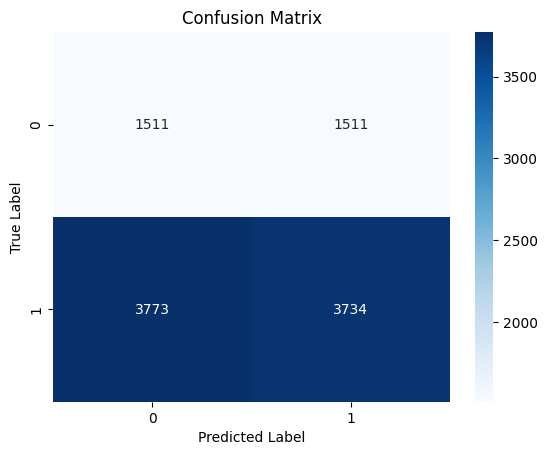

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_bknn)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## HyperPrameter tunning For Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf_param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Max depth of the tree
    'min_samples_split': randint(2, 10),  # Min samples required to split an internal node
    'min_samples_leaf': randint(1, 5),  # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rf = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=30, cv=3, n_jobs=-1, verbose=2, random_state=42
)
random_search_rf.fit(X_train_res, y_train_res)
best_model_rf = random_search_rf.best_estimator_
print("Best parameters found: ", random_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search_rf.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 113}
Best cross-validation score: 0.80


In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_hp)}")

NameError: name 'y_pred_rf_hp' is not defined

## HyperParameter tunning For KNN

In [ ]:
knn_param_dist = {
    'n_neighbors': randint(3, 15),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function for prediction
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'leaf_size': randint(20, 100)  # Leaf size for ball tree and kd tree
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=knn_param_dist, n_iter=30, cv=3, n_jobs=-1, verbose=2, random_state=42
)

# Fit the RandomizedSearchCV
random_search_knn.fit(X_train_res, y_train_res)
best_model_knn = random_search_knn.best_estimator_
# Get the best parameters and score
print("Best parameters found: ", random_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search_knn.best_score_))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'algorithm': 'brute', 'leaf_size': 66, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.77


In [ ]:
best_model_knn.fit(X_train_res,y_train_res)
y_pred_knn_hp=best_model_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_hp)}")

Accuracy Score = 0.5625415519042644
precission Score = 0.7175641217939103
Recall Score = 0.6372718795790595
F1 Score = 0.6750388034429237


### After Hyper parameter tunnning Random forest outperforms KNN model

In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
5,41,1,0,1,2,36.11,0,0,271.2,141,119,0,1,1,0,0,1,0,101,0
6,20,1,1,0,1,15.12,0,0,164.8,154,67,0,1,2,1,0,1,0,176,1


## Feature selection


In [ ]:
# Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) for automatically automatically selects the best number of features by evaluating model performance iteratively.
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf, step=2, cv=5, scoring='r2')

# Fit RFECV on the resampled training dataset
rfecv.fit(X_train_res, y_train_res)

# Get the optimal number of selected features
optimal_num_features = rfecv.n_features_
print(f"Optimal number of features: {optimal_num_features}")

# Get a boolean mask indicating which features were selected (True for selected, False for removed)
selected_features = rfecv.support_
print(f"Selected Features: {selected_features}")

Optimal number of features: 19
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


### RFECV is unlikely to remove features based on redundancy since the features are not highly correlated

# Final Model


### Random Forest Regressor

In [ ]:
# training the final model for randomforest using best parameter and selected features
best_model_rf.fit(X_train_res,y_train_res)
y_pred_rf_final=best_model_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_final)}")

Accuracy Score = 0.7052901510114921
precission Score = 0.712877030162413
Recall Score = 0.9822832023444785
F1 Score = 0.8261722032379138


### KNN

In [ ]:
# training the final model for KNN using best parameter and selected features
best_model_knn.fit(X_train_res,y_train_res)
y_pred_knn_final=best_model_knn.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_final)}")

Accuracy Score = 0.5625415519042644
precission Score = 0.7175641217939103
Recall Score = 0.6372718795790595
F1 Score = 0.6750388034429237


Conclusion:
1. Accuracy: Random Forest has a higher accuracy score of 0.705, compared to KNN's 0.567, indicating better overall classification performance.
2. Precision: Both models show similar precision scores, with Random Forest at 0.713 and KNN at 0.714, suggesting that both models are equally good at avoiding false positives.
3. Recall: Random Forest significantly outperforms KNN in recall, with a score of 0.982 compared to KNN's 0.655. This indicates that the Random Forest model is much better at identifying true positives (heart disease cases).
4. F1 Score: The F1 score for Random Forest is 0.826, while KNN's is 0.683, reflecting the superior balance of precision and recall in the Random Forest model.
5. So Random forest perform better than KNN in the given dataset